In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path to the CSV file
file_path = "../Preprocessing/Data_reserved/HA_original.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
df.head()

,ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


#### Data Normalisation and Tranformation

In [192]:
# Convert 'Continent' and 'Hemisphere' to numeric
df['Continent'] = df['Continent'].astype('category').cat.codes
df['Hemisphere'] = df['Hemisphere'].astype('category').cat.codes

# Convert 'Diet' and 'Sex' to numeric if they contain non-numeric data
df['Diet'] = df['Diet'].astype('category').cat.codes
df['Sex'] = df['Sex'].astype('category').cat.codes

# Drop 'ID' and 'Country' columns
df.drop(columns=['ID', 'Country'], inplace=True)

# Split 'Blood Pressure' into 'Systolic_BP' and 'Diastolic_BP'
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

# Drop the original 'Blood Pressure' column
df.drop(columns=['Blood Pressure'], inplace=True)

# Convert all remaining columns to int64 or float64
df = df.astype({'Continent': 'int64', 'Hemisphere': 'int64', 'Diet': 'int64', 'Sex': 'int64'})

# Display the updated DataFrame
df.head()


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,261404,31.251233,286,0,6,5,1,0,158.0,88.0
1,21,1,389,98,1,1,1,1,1,1.813242,...,285768,27.194973,235,1,7,4,0,0,165.0,93.0
2,21,0,324,72,1,0,0,0,0,2.078353,...,235282,28.176571,587,4,4,3,0,0,174.0,99.0
3,84,1,383,73,1,1,1,0,1,9.828130,...,125640,36.464704,378,3,4,4,0,0,163.0,100.0
4,66,1,318,93,1,1,1,1,0,5.804299,...,160555,21.809144,231,1,5,1,0,0,91.0,88.0


#### Data Standardised 

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [52]:
# Create a new DataFrame as a copy of the original
new_df = df.copy()

# Save the new DataFrame to a new CSV file
new_file_path = "../Preprocessing/Data_reserved/HA_modified.csv"
new_df.to_csv(new_file_path, index=False)


#### Data processing and Modeling

In [53]:
# Define features set
X =new_df.copy()
X.drop("Heart Attack Risk", axis=1, inplace=True)
X.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Systolic_BP,Diastolic_BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,5,1,158.0,88.0
1,21,1,389,98,1,1,1,1,1,1.813242,...,4.963459,285768,27.194973,235,1,7,4,0,165.0,93.0
2,21,0,324,72,1,0,0,0,0,2.078353,...,9.463426,235282,28.176571,587,4,4,3,0,174.0,99.0
3,84,1,383,73,1,1,1,0,1,9.828130,...,7.648981,125640,36.464704,378,3,4,4,0,163.0,100.0
4,66,1,318,93,1,1,1,1,0,5.804299,...,1.514821,160555,21.809144,231,1,5,1,0,91.0,88.0


In [54]:
new_df.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.697364,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,...,158263.181901,28.891446,417.677051,3.489672,7.023508,2.428849,0.354102,0.358211,135.075659,85.156111
std,21.249509,0.459425,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,...,80575.190806,6.319181,223.748137,2.282687,1.988473,1.597561,0.478268,0.479502,26.349976,14.676565
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,...,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,90.000000,60.000000
25%,35.000000,0.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,...,88310.000000,23.422985,225.500000,2.000000,5.000000,1.000000,0.000000,0.000000,112.000000,72.000000
50%,54.000000,1.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,...,157866.000000,28.768999,417.000000,3.000000,7.000000,3.000000,0.000000,0.000000,135.000000,85.000000
75%,72.000000,1.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,...,227749.000000,34.324594,612.000000,5.000000,9.000000,4.000000,1.000000,1.000000,158.000000,98.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,...,299954.000000,39.997211,800.000000,7.000000,10.000000,5.000000,1.000000,1.000000,180.000000,110.000000


In [70]:
 # Define target vector
y =new_df["Heart Attack Risk"].ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


#### Model Testing

##### 1) Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# Create the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=500)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=500)

In [73]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


In [74]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_new_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [75]:
# Displaying results
print("Confusion Matrix")
display(cm_new_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2234,22
Actual 1,1242,8


Accuracy Score : 0.6394751853964632
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      2256
           1       0.27      0.01      0.01      1250

    accuracy                           0.64      3506
   macro avg       0.45      0.50      0.40      3506
weighted avg       0.51      0.64      0.51      3506



#### Information on Feature Important

In [76]:
# Retrieve feature importances and sort them
importances = rf_model.feature_importances_
sorted_importances = sorted(zip(importances, X.columns), reverse=True)

# Display the sorted feature importances
for importance, feature in sorted_importances:
    print(f"{feature}: {importance}")


BMI: 0.0784267128991013
Exercise Hours Per Week: 0.07758274664950413
Sedentary Hours Per Day: 0.07739359946671667
Triglycerides: 0.07707592924877255
Income: 0.07679929234612796
Cholesterol: 0.07340295334353442
Systolic_BP: 0.07008126249145905
Heart Rate: 0.06815775036217502
Age: 0.06758801768141431
Diastolic_BP: 0.06546113257813474
Stress Level: 0.043814277093115174
Physical Activity Days Per Week: 0.03996442703812867
Sleep Hours Per Day: 0.037185633778796835
Continent: 0.030612084358370102
Diet: 0.019521259883640837
Previous Heart Problems: 0.012383513409081543
Medication Use: 0.0119961673701642
Family History: 0.011962626938313042
Obesity: 0.011645644897426852
Diabetes: 0.01098410043013694
Hemisphere: 0.01097639407710621
Sex: 0.010616375976542735
Alcohol Consumption: 0.010507652100620966
Smoking: 0.005860445581615718


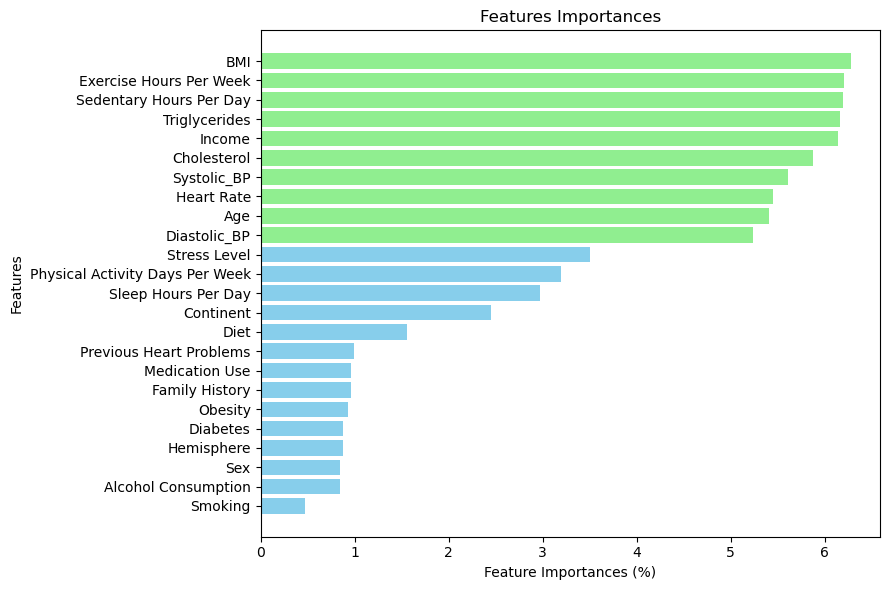

In [127]:
import numpy as np

# Define the list of features that need specific colors
features_with_specific_colors = ['Triglycerides','Heart Rate', 'Income', 'Exercise Hours Per Week', 'BMI', 'Sedentary Hours Per Day', 'Age', 'Cholesterol', 'Diastolic_BP', 'Systolic_BP']

importances_new_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_new_df.set_index(importances_new_df[1], inplace=True)
importances_new_df.drop(columns=1, inplace=True)
importances_new_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_new_df.sort_values(by='Feature Importances')

# Calculate percentages for x-axis
importances_sorted['Feature Importances (%)'] = (importances_sorted['Feature Importances'] * 80) / importances_sorted['Feature Importances'].sum()

# Create a color map for features
colors = ['skyblue' if feature not in features_with_specific_colors else 'lightgreen' for feature in importances_sorted.index]

# Plotting
plt.figure(figsize=(9, 6))
plt.barh(importances_sorted.index, importances_sorted['Feature Importances (%)'], color=colors)
plt.title('Features Importances')
plt.xlabel('Feature Importances (%)')
plt.ylabel('Features')

# Save as picture file
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()


##### 2) Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an instance of the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [81]:
# Make predictions 
dt_predictions = dt_model.predict(X_test) 

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Generate classification report and confusion matrix
print(classification_report(y_test, dt_predictions))
print(confusion_matrix(y_test, dt_predictions))
print(f"Accuracy Score: {dt_accuracy}")


              precision    recall  f1-score   support

           0       0.63      0.63      0.63      2256
           1       0.34      0.34      0.34      1250

    accuracy                           0.53      3506
   macro avg       0.49      0.49      0.49      3506
weighted avg       0.53      0.53      0.53      3506

[[1427  829]
 [ 823  427]]
Accuracy Score: 0.5288077581289219


##### 3) KNN Model

In [87]:
from sklearn.neighbors import KNeighborsClassifier


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1140
           1       0.38      0.27      0.31       613

    accuracy                           0.59      1753
   macro avg       0.52      0.51      0.51      1753
weighted avg       0.56      0.59      0.57      1753


Confusion Matrix:
[[864 276]
 [447 166]]


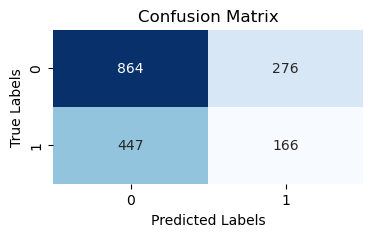

In [95]:
# Splitting the data into features (X) and target variable (y)
X = new_df.drop(columns=['Heart Attack Risk'])  
y = new_df['Heart Attack Risk']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creating the KNN classifier model
knn_classifier = KNeighborsClassifier(n_neighbors=5)  

# Fitting the model to the training data
knn_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Generating and printing the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generating and printing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix using seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#### 4) Logistic Regression 

In [108]:
from sklearn.linear_model import LogisticRegression

# Creating the Logistic Regression model
logistic_regression = LogisticRegression()

C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1140
           1       0.00      0.00      0.00       613

    accuracy                           0.65      1753
   macro avg       0.33      0.50      0.39      1753
weighted avg       0.42      0.65      0.51      1753


Confusion Matrix:
[[1140    0]
 [ 613    0]]


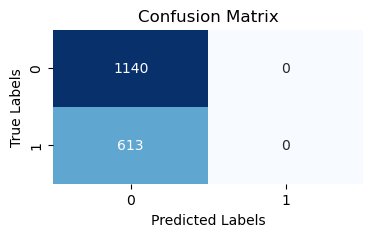

In [115]:
# Splitting the data into features (X) and target variable (y)
X = new_df.drop(columns=['Heart Attack Risk'])  # Features
y = new_df['Heart Attack Risk']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting the model to the training data
logistic_regression.fit(X_train, y_train)

# Making predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Generating and printing the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generating and printing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix using seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


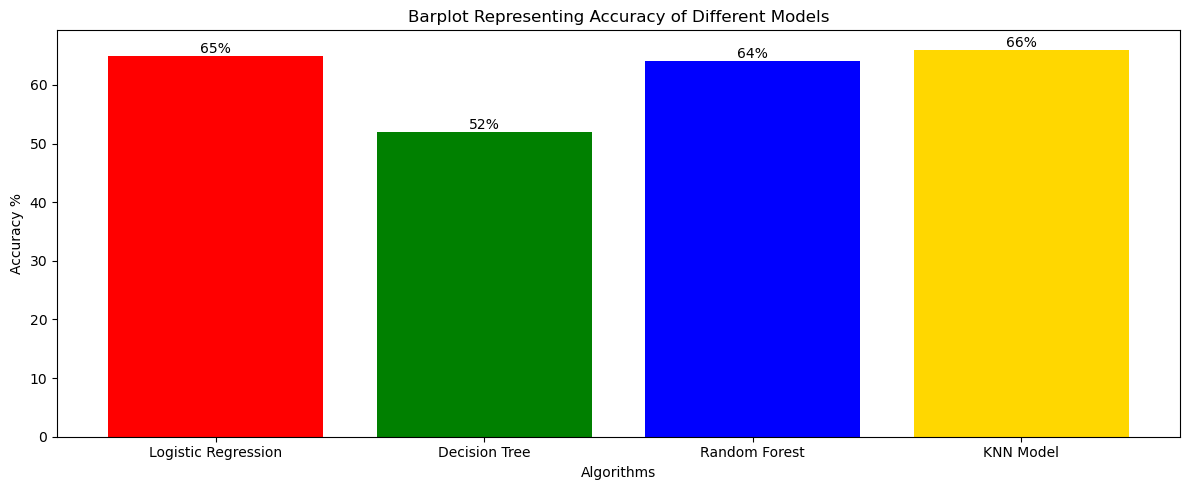

In [113]:
# Sample data (replace this with your actual accuracies)
accuracies = [65, 52, 64, 66]  # Replace with your accuracy values
colors = ['red', 'green', 'blue', 'gold']
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN Model']

plt.figure(figsize=(12, 5))
plt.title("Barplot Representing Accuracy of Different Models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")

# Bar plot with accuracy values
bars = plt.bar(model_names, accuracies, color=colors)

# Annotate each bar with its accuracy value
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy}%', 
             ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()


#### The current set of models did not produce the anticipated results. To enhance accuracy, a broader spectrum of models could be explored, potentially including ensemble methods or more complex algorithms. Additionally, a strategy to enhance accuracy might involve partitioning the dataset into smaller sections for in-depth analysis or focusing solely on crucial features identified through feature importance techniques. This targeted approach could lead to more refined and effective models.

#### Creating partitioning dataset CSV for features Important ( moving to new file)

In [26]:
# Selecting the specified important features
important_features = ['Heart Attack Risk','Triglycerides', 'Income', 'Exercise Hours Per Week', 'BMI', 'Sedentary Hours Per Day',
                      'Age', 'Cholesterol', 'Diastolic_BP', 'Systolic_BP']

# Creating a new DataFrame with only the important features
features_important = new_df[important_features]

# Save the DataFrame with important features to a new CSV file
features_important.to_csv('features_important.csv', index=False)


In [27]:
features_important.head()

,Heart Attack Risk,Triglycerides,Income,Exercise Hours Per Week,BMI,Sedentary Hours Per Day,Age,Cholesterol,Diastolic_BP,Systolic_BP
0,0,286,261404,4.168189,31.251233,6.615001,67,208,88.0,158.0
1,0,235,285768,1.813242,27.194973,4.963459,21,389,93.0,165.0
2,0,587,235282,2.078353,28.176571,9.463426,21,324,99.0,174.0
3,0,378,125640,9.828130,36.464704,7.648981,84,383,100.0,163.0
4,0,231,160555,5.804299,21.809144,1.514821,66,318,88.0,91.0
